# SimpleITK Read / Write for 3D MetaImage
In this notebook, we will be using Simple Insight Toolkit (SimpleITK) to open, modify and save a 3D MetaImage file format image (mhd/img pair)
1. Start by creating a Python virtual env using either venv or conda.
2. Depending on your environment, you can install the itk toolkit using either:
> pip install simpleitk \
> conda install -c conda-forge simpleitk

3. Using the same install method you used for SimpleITK, install numpy and matplotlib
4. You are now ready to proceed with the notebook

In [1]:
import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install SimpleITK numpy matplotlib

In [2]:
# Import Insight Toolkit
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_mhd_image(filename):
    # Read the image using SimpleITK
    itk_image = sitk.ReadImage(filename)

    # Convert the image to a numpy array, this is so we can display slices with matplotlib
    image_array = sitk.GetArrayFromImage(itk_image)

    # Read the origin from the metadata, which can be used to convert the coordinates from world to voxel and vice versa
    origin = np.array(list(itk_image.GetOrigin()))

    # Read the spacing along each dimension
    spacing = np.array(list(itk_image.GetSpacing()))

    return itk_image, image_array, origin, spacing

In [6]:
# Path to the data header. Note that the header contains the filename for the .raw
input_image = './mhd/raw_mhd.mhd'    # Replace with path to your data

# Use the load function to load the image
itk_image, image_array, origin, spacing = load_mhd_image(input_image)

To demonstrate that we have correctly loaded the data, we will display slices along the z-axis using matplotlib \
Note: 
- By default, SimpleITK loads volumes with axes reversed, e.g. (z, y, x). This means the z-axis is our first dimension

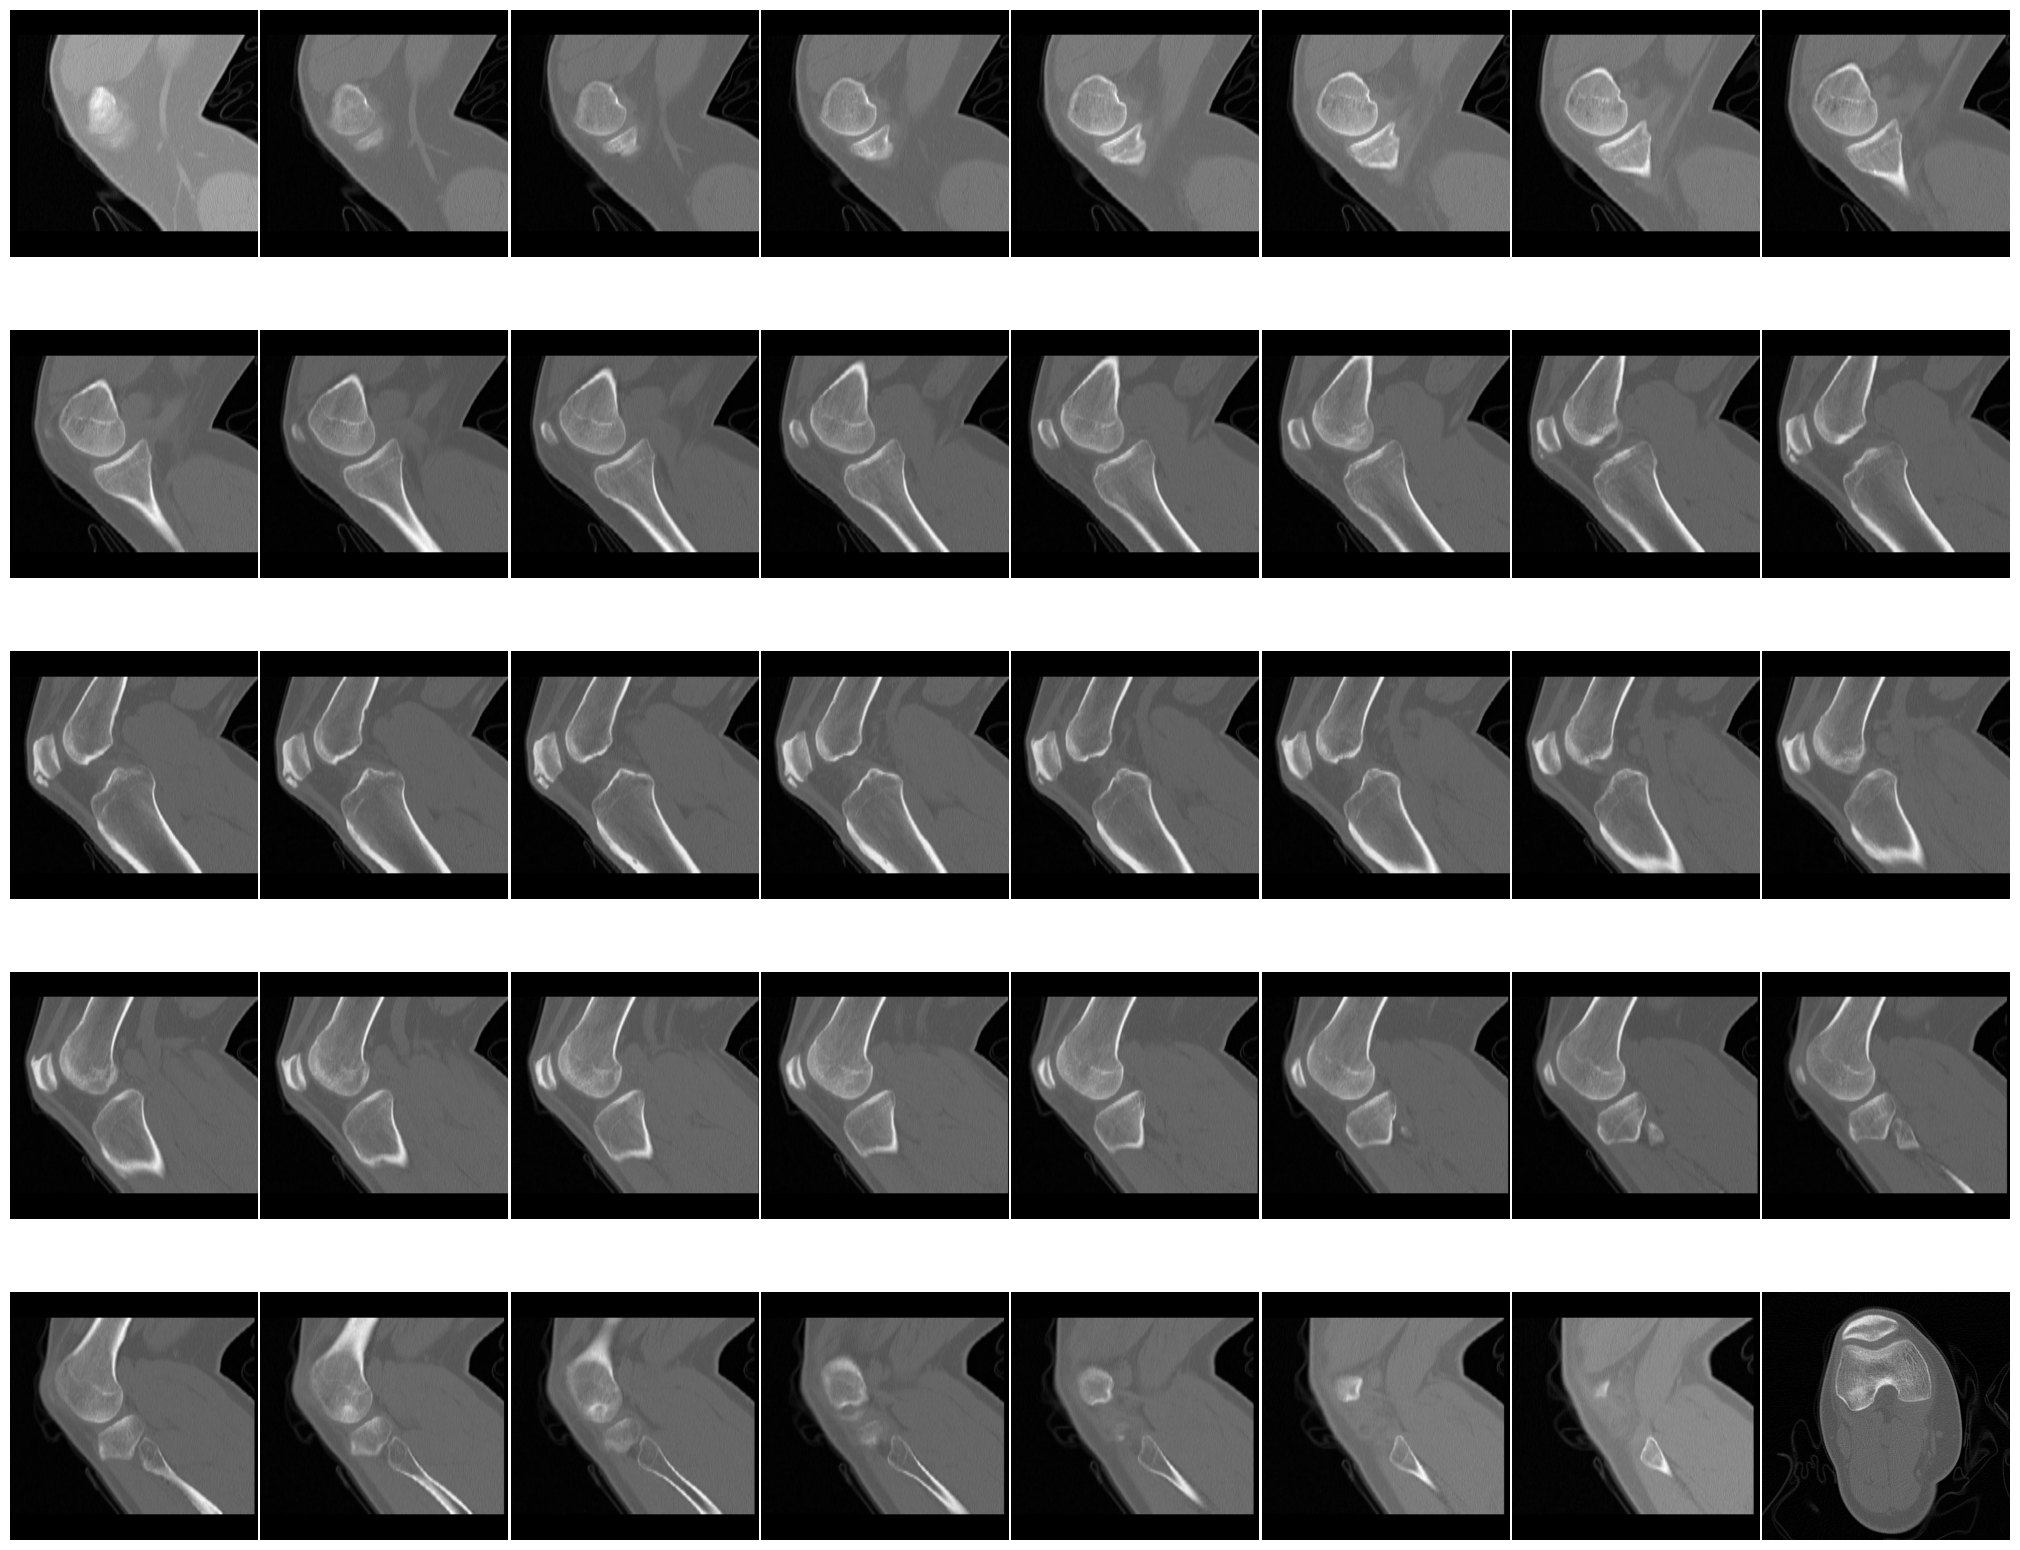

origin= array([0., 0., 0.]), spacing= array([0.388672, 0.388672, 2.      ])


In [7]:
plt.figure(figsize=(20,16))
# Set colormap to greyscale
plt.gray()
# Set subplot spacing
plt.subplots_adjust(0, 0, 1, 1, 0.01, 0.01)
for i in range(image_array.shape[0]):
    plt.subplot(5, (image_array.shape[0] // 5), i+1)
    plt.imshow(image_array[i])
    plt.axis('off')
plt.show()

# Print the image origin, and spacing
print(f"{origin= }, {spacing= }")

Now, let's export the data as in the Analyze file format (hdr / img pair) for use with appropriate viewer e.g. MedInria

In [8]:
# SimpleITK WriteImage will automatically detect the correct format based on the file extension
sitk.WriteImage(image=itk_image, fileName="raw_hdr.hdr")

Try opening the .hdr file in MedInria to check that the write operation was successful
